In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


5Years

In [ ]:
import pandas as pd

final_5y = '/content/drive/MyDrive/ajou/41_ML/project/modified data/final_5y.csv'
final_data =  pd.read_csv(final_5y, encoding='ISO-8859-1')

R² Score: 0.5123839711716134
Adjusted R² Score: 0.47400020213847505


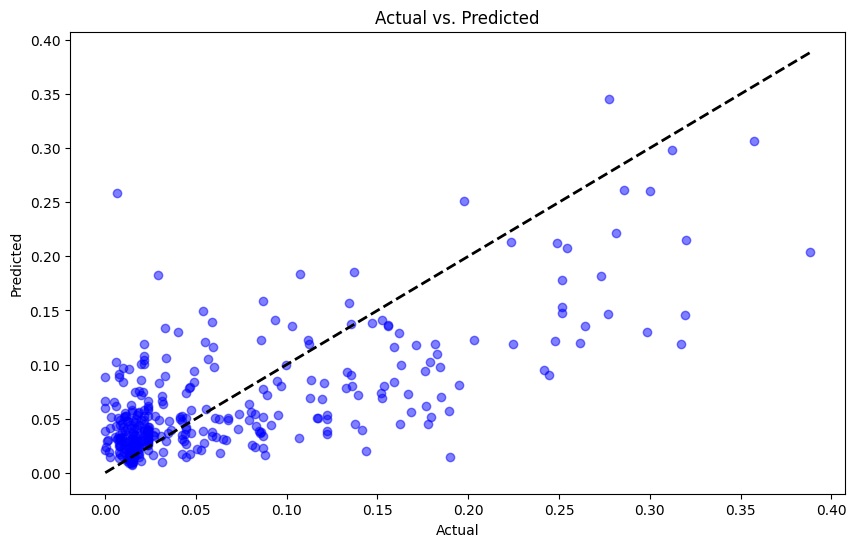

In [ ]:
# 5years test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 입력 열과 타겟 열 선택
X = final_data[['debut', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
predictions = rf_model.predict(X_test)

# R² 및 Adjusted R² 계산
r2 = rf_model.score(X_test, y_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# 출력
print("R² Score:", r2)
print("Adjusted R² Score:", adj_r2)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

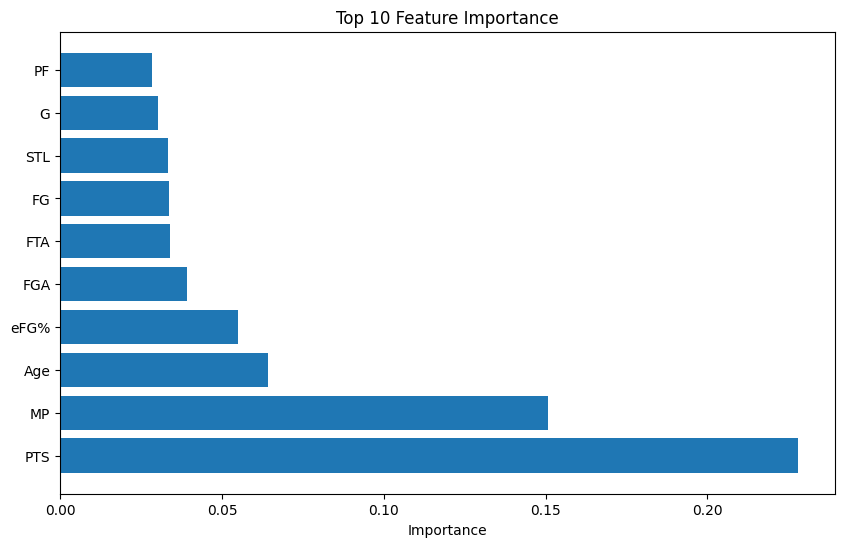

Top 10 Features:
PTS
MP
Age
eFG%
FGA
FTA
FG
STL
G
PF


In [ ]:
# 5years feature importance
import matplotlib.pyplot as plt

# Feature Importance 시각화 (상위 10개 특성)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices[:10])), importances[top_features_indices[:10]], align='center')
plt.yticks(range(len(top_features_indices[:10])), top_features[:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

# 상위 10개 Feature 출력
print("Top 10 Features:")
for feature in top_features[:10]:
    print(feature)

In [ ]:
# 5years / 8:2
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 입력 열과 타겟 열 선택
X = final_data[['debut', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 특성 중요도 기준으로 상위 10개 특성 선택
importances = rf_model.feature_importances_
top_features_indices = importances.argsort()[-10:][::-1]  # 중요도 내림차순으로 정렬 후 상위 10개 인덱스 선택
top_features = X.columns[top_features_indices]

Best R² Score: 0.5572129210964745
Best Adjusted R² Score: 0.555749645885293
Best Features: ['MP', 'PTS', 'FG', 'Age', 'FT']


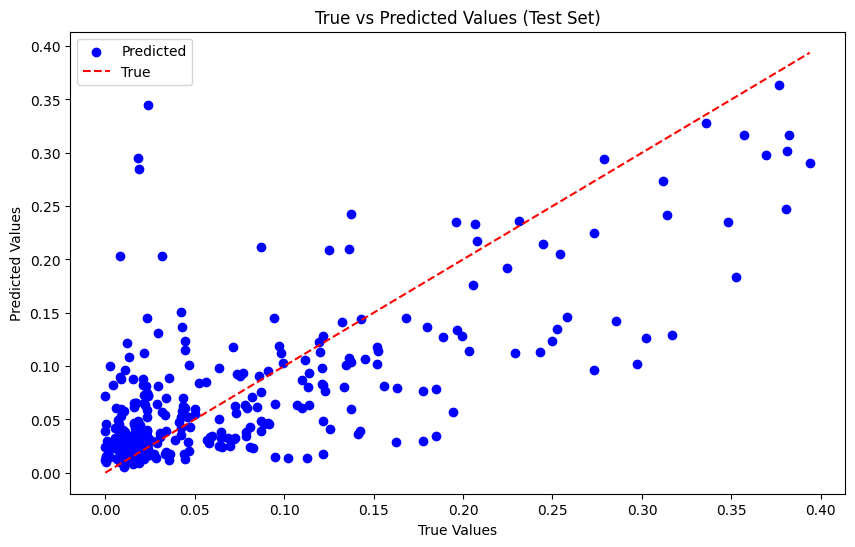

In [ ]:
# 5years / 8:2 / 5features
best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 6):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features[:5], r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[features]
        model = RandomForestRegressor()  # 원하는 회귀 모델로 변경 가능
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor()
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

Best R² Score: 0.5495433280522593
Best Adjusted R² Score: 0.5474012107264208
Best Features: ['Age', 'eFG%', 'FGA', 'FTA', 'STL', 'G', 'PF']


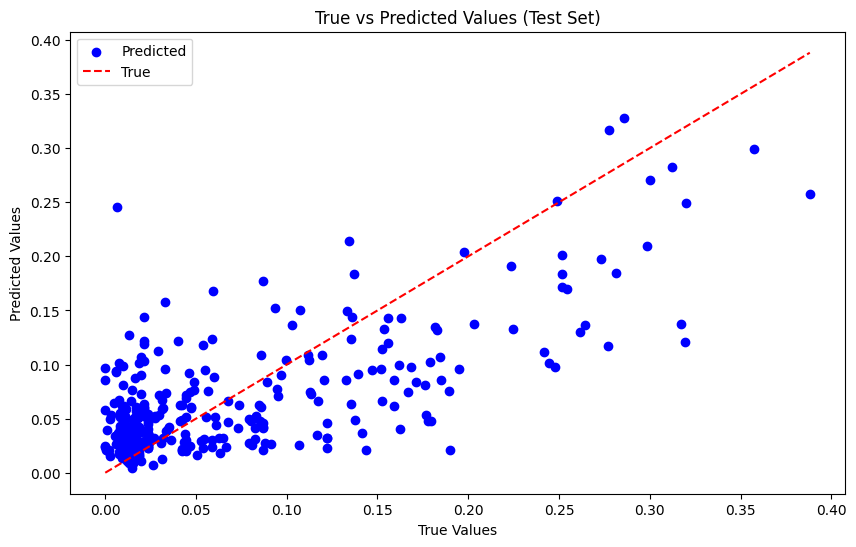

In [ ]:
# 5years / 8:2 / 10features
best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 11):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features[:10], r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[features]
        model = RandomForestRegressor()  # 원하는 회귀 모델로 변경 가능
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor()
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

In [ ]:
# 5years / 9:1
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 입력 열과 타겟 열 선택
X = final_data[['debut', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.1, random_state=42)

# 특성 중요도 기준으로 상위 10개 특성 선택
importances = rf_model.feature_importances_
top_features_indices = importances.argsort()[-10:][::-1]  # 중요도 내림차순으로 정렬 후 상위 10개 인덱스 선택
top_features = X.columns[top_features_indices]

Best R² Score: 0.47450591034026174
Best Adjusted R² Score: 0.47292214274032285
Best Features: ['PTS', 'MP', 'Age', 'eFG%', 'FGA']


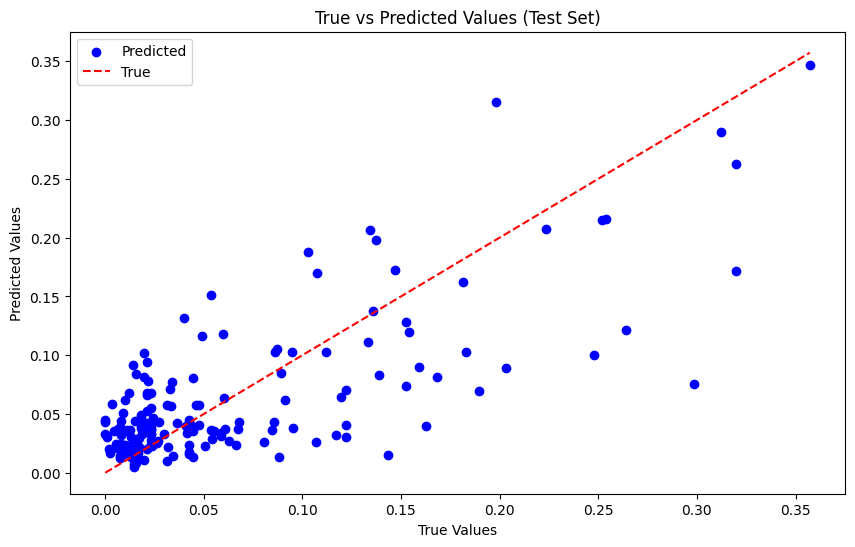

In [ ]:
# 5years / 9:1 / 5features
best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 6):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features[:5], r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[features]
        model = RandomForestRegressor()  # 원하는 회귀 모델로 변경 가능
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor()
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

Best R² Score: 0.5405994757892887
Best Adjusted R² Score: 0.5383801495853722
Best Features: ['PTS', 'Age', 'eFG%', 'FGA', 'FTA', 'STL', 'G', 'PF']


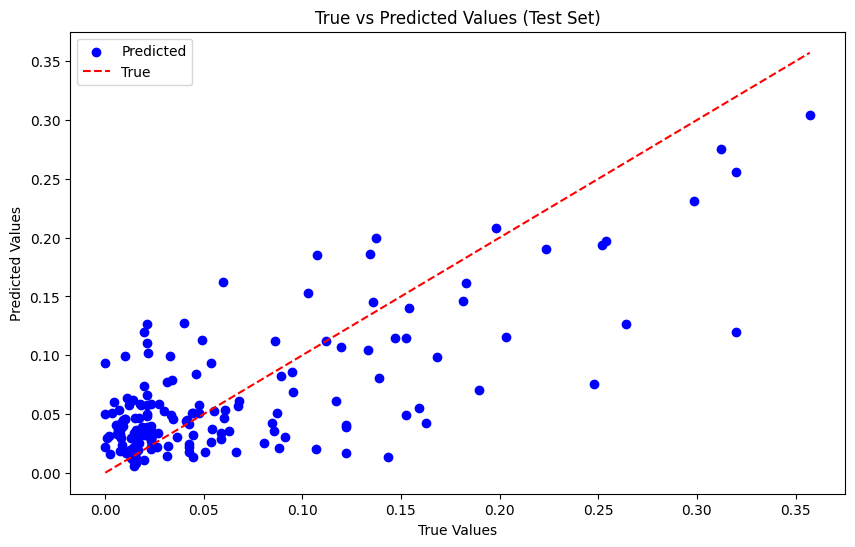

In [ ]:
# 5years / 9:1 / 10features
best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 11):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features[:10], r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[features]
        model = RandomForestRegressor()  # 원하는 회귀 모델로 변경 가능
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor()
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

3Years

In [ ]:
import pandas as pd

final_3y = '/content/drive/MyDrive/ajou/41_ML/project/modified data/final_3y.csv'
final_data =  pd.read_csv(final_3y, encoding='ISO-8859-1')

R² Score: 0.6345067303401366
Adjusted R² Score: 0.6064717352241811


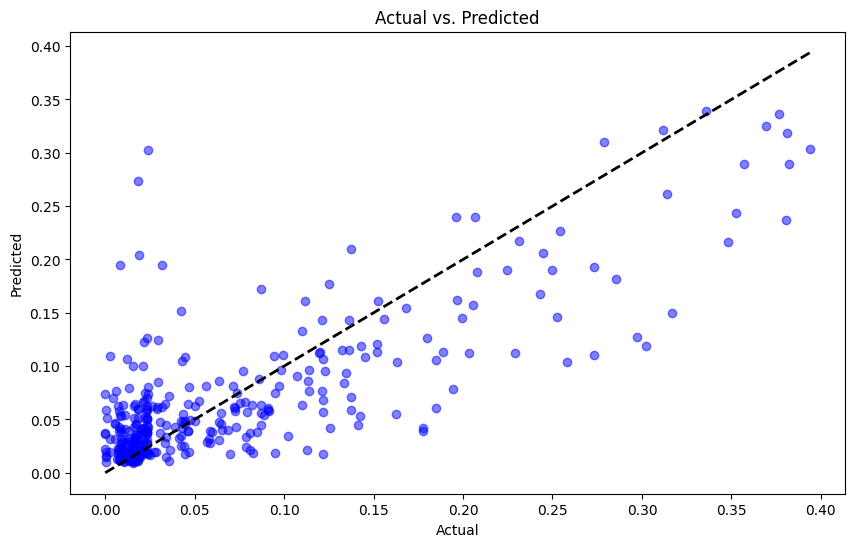

In [ ]:
# 3years test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 입력 열과 타겟 열 선택
X = final_data[['debut', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
predictions = rf_model.predict(X_test)

# R² 및 Adjusted R² 계산
r2 = rf_model.score(X_test, y_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# 출력
print("R² Score:", r2)
print("Adjusted R² Score:", adj_r2)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

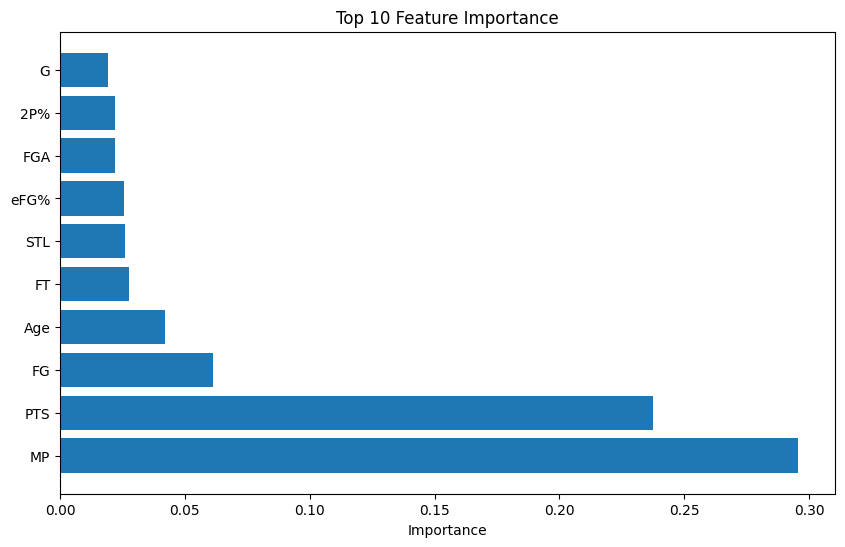

Top 10 Features:
MP
PTS
FG
Age
FT
STL
eFG%
FGA
2P%
G


In [ ]:
# 3years feature importance
import matplotlib.pyplot as plt

# Feature Importance 시각화 (상위 10개 특성)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices[:10])), importances[top_features_indices[:10]], align='center')
plt.yticks(range(len(top_features_indices[:10])), top_features[:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

# 상위 10개 Feature 출력
print("Top 10 Features:")
for feature in top_features[:10]:
    print(feature)

In [ ]:
# 3years / 8:2
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 입력 열과 타겟 열 선택
X = final_data[['debut', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
                'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 특성 중요도 기준으로 상위 10개 특성 선택
importances = rf_model.feature_importances_
top_features_indices = importances.argsort()[-10:][::-1]  # 중요도 내림차순으로 정렬 후 상위 10개 인덱스 선택
top_features = X.columns[top_features_indices]

Best R² Score: 0.6189017280777317
Best Adjusted R² Score: 0.6166287761577182
Best Features: ['PTS', 'MP', 'Age', 'FG', 'eFG%', 'PF', 'G', 'STL', '2P%']


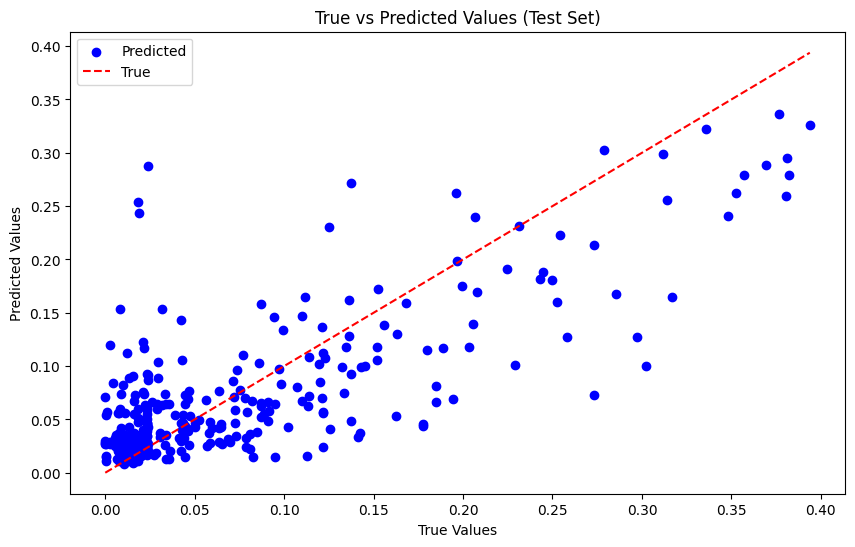

In [ ]:
# 3years / 8:2 / 10features
best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 11):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features[:10], r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[features]
        model = RandomForestRegressor()  # 원하는 회귀 모델로 변경 가능
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor()
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()